# IBM Developer Skills Network

# Geometric Operations using OpenCV

In [1]:
# All images are in previous lessions

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Define a function to draw 2 images side by side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Geometric Transformations

## Scaling

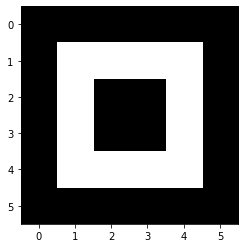

In [4]:
toy_image = np.zeros((6,6))
toy_image[1:5, 1:5] = 255
toy_image[2:4, 2:4] = 0
plt.imshow(toy_image, cmap='gray')
plt.show()

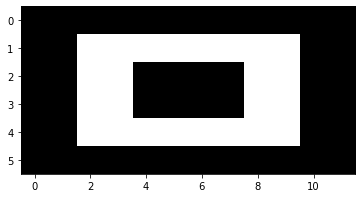

In [5]:
# The parameter interpolation estimates pixel values based on neighboring pixels. 
# INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.
new_toy = cv2.resize(toy_image, None, fx=2, fy=1, interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy, cmap='gray')
plt.show()

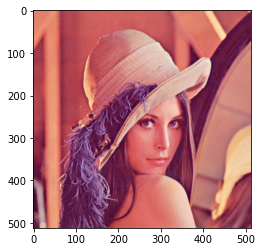

In [6]:
image = cv2.imread('lenna.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

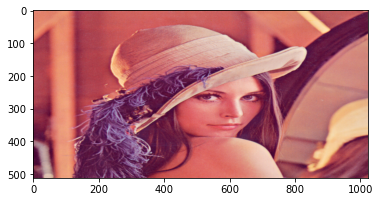

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [7]:
# Scale hor by 2, ver by 1
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

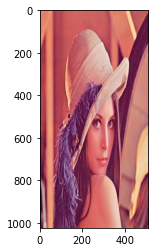

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [8]:
# ver by 2
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

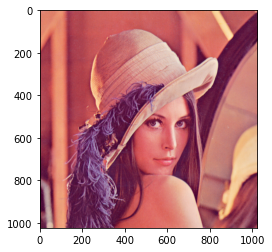

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [9]:
# both by 2
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

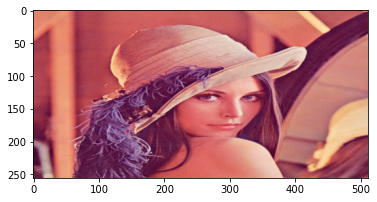

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [10]:
# shrink by half
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

In [11]:
# Specify the number of row and column
rows = 100
cols = 200

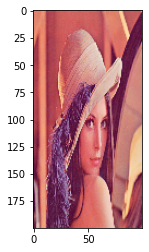

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [12]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

## Translation

In [13]:
# shift 100 pixels hor
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [14]:
rows, cols, _ = image.shape

In [15]:
# We use the function warpAffine from the cv2 module. 
# The first input parater is an image array, 
# the second input parameter is the transformation matrix M, 
# and the final input paramter is the length and width of the output image  (𝑐𝑜𝑙𝑠,𝑟𝑜𝑤𝑠) 
new_image = cv2.warpAffine(image, M, (cols, rows))

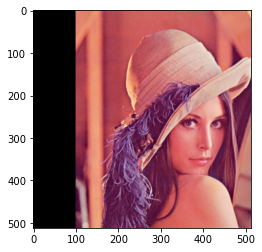

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

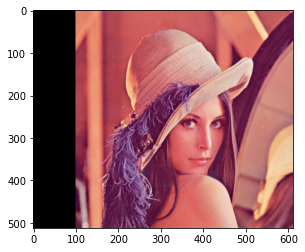

In [17]:
# Change the output size to preserve original image detail
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation

In [18]:
# We can rotate an image by angle θ which is achieved by the Rotation Matrix getRotationMatrix2D.
# center: Center of the rotation in the source image. We will only use the center of the image.
# angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
# scale: Isotropic scale factor, in this course the value will be one

theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

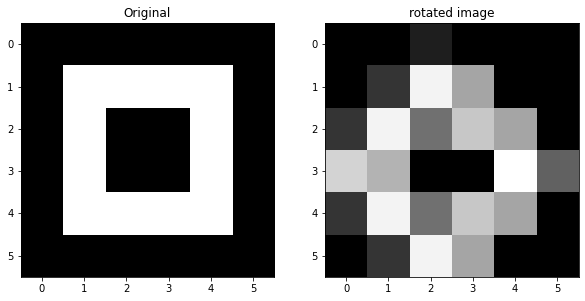

In [19]:
# Many values are interpolated after rotation
plot_image(toy_image, new_toy_image, title_1='Original', title_2='rotated image')

In [20]:
cols, rows, _ = image.shape

In [21]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

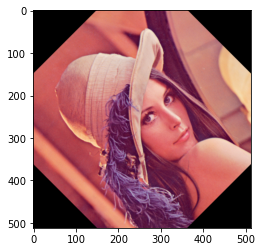

In [22]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations

## Array operation

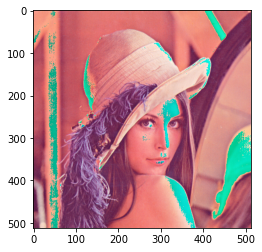

In [23]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

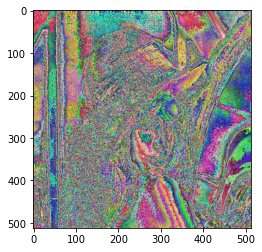

In [24]:
# Multiply with constant value
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

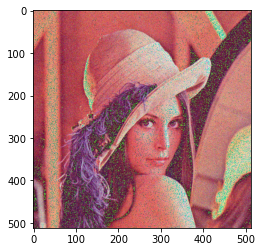

In [26]:
new_image = image + Noise
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

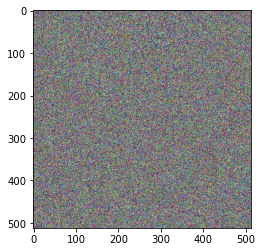

In [27]:
new_image = image * Noise
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Matrix Operations

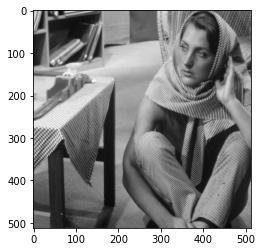

In [28]:
# Grayscale images are matrices
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray, cmap='gray')
plt.show()

In [29]:
U, s, V = np.linalg.svd(im_gray, full_matrices=True)

In [30]:
# s is not rectangular
s.shape

(512,)

In [31]:
# Convert s to diagonal matrix S
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

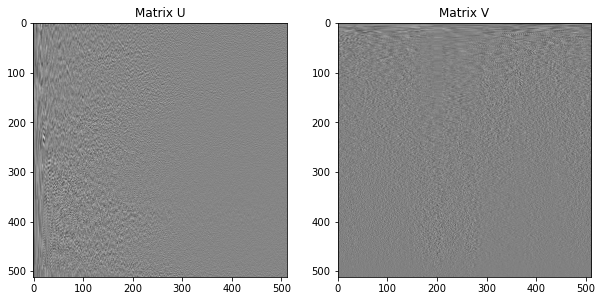

In [32]:
plot_image(U, V, title_1='Matrix U', title_2='Matrix V')

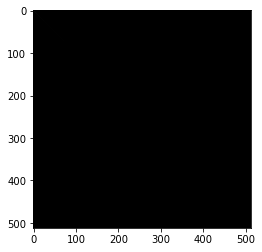

In [33]:
plt.imshow(S, cmap='gray')
plt.show()

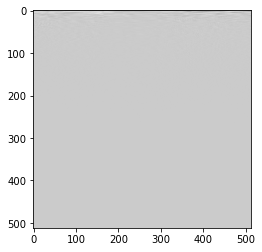

In [34]:
B = S.dot(V)
plt.imshow(B, cmap='gray')
plt.show()

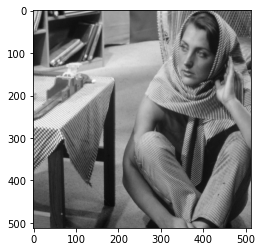

In [35]:
A = U.dot(B)
plt.imshow(A, cmap='gray')
plt.show()

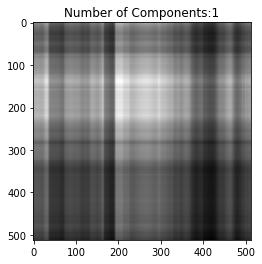

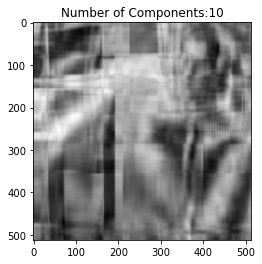

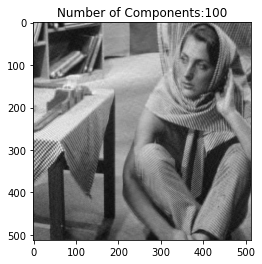

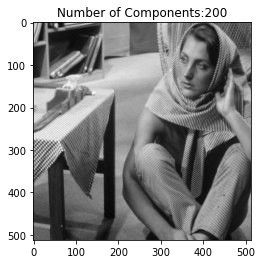

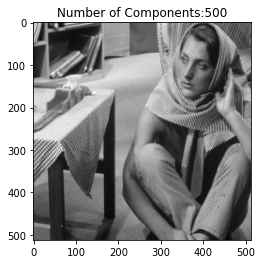

In [36]:
# Many columns are redundant, some can be eliminated but still possible to reconstruct the original image
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()